In [1]:
### Libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

In [2]:
class lin_reg(object):
    
    """
    A class to implement and use linear regression.
    
    ...

    Attributes
    ----------
    california : obj
        Example: self.california = fetch_california_housing(), self.california.DESCR for more info.
        
    data, X_train, X_test: pd.DataFrame
        Filtered data for missing values with California housing features; data for testing and training
        after random split; 20 000 data points used for training and 640 for testing. 
    
    target, y_train, y_test, y_predict: pd.DataFrame
        Filtered data for missing values with California housing target; target for testing and training
        after random split; 20 000 data points used for training and 640 for testing.
    
    'linreg','linreg_ols','linreg_rf','linreg_summary','rf_reg': obj
        Python objects for linear regression models.
    
    'rsq': numpy float 
        R^2 coefficient as regression metric to evaluate the model performance. 
    
    
    Methods
    -------
    plot_features():
        Plots all features with respect to the target and the correlation matrix.
    split():
        Splitting at random to train - test franctions.
    fit_predict_linear(ols = True):
        Fitting the model with Ordinary Least Squares regression a.k.a OLS if ols = True. Evaluates
        all regression coefficients and the intercept as well. If false, Random Forest Regressor is used. 
        Then, the model chosen is trained with X_train and y_train. Aslo, predictions for the 
        target y_predict are included too.
    err_plot():
        Calculates the R^2 from the predicted and the expected values of the target y.
        A 2D scatter plot available too.   
    """  
    
    
    __slots__ = ['california','data','target',
                 'X_train','X_test','y_train','y_test','y_predict',
                 'linreg','linreg_ols','linreg_rf','linreg_summary','rf_reg','rsq']
    
    def __init__(self):
        
        self.california = fetch_california_housing()
        
        self.data = pd.DataFrame(self.california.data, columns = self.california.feature_names)
        self.data = self.data.fillna(0)
        self.target = pd.DataFrame(self.california.target, columns = self.california.target_names)
        self.target = self.target.fillna(0)
        
        print('\nData successfully loaded\n', '\nSize:\n', self.data.shape, '\n')
        print('\nData head:\n', self.data.head())
        print('\nTarget successfully loaded\n', '\nSize:\n', self.target.shape, '\n')
        print('\nData head:\n', self.target.head())
         
    def col_name(self,data):
        for colname in data.columns:
            yield colname
            
    def plots(plot_details):
        def create_figure(*args, **kwargs):
            plot_details(*args, **kwargs)
            plt.tight_layout()
            plt.show()
            sns.set(font_scale=2)
            sns.set_style('whitegrid')
        return create_figure

    @plots
    def plot_features(self):
        for colname in self.col_name(self.data):
            plt.figure(figsize = (16, 9))
            sns.scatterplot(data = pd.concat([self.data, self.target], axis = 1), 
                            x = colname, y = 'MedHouseVal', hue = 'MedHouseVal',
                            palette = 'cool', legend = False)
            plt.title(f'Scatter plot of {colname} against Median House Value')
            plt.xlabel(colname)
            plt.ylabel('Median House Value')
        
        plt.figure(figsize=(16, 9))
        sns.heatmap(pd.concat([self.data, self.target], axis = 1).corr(), annot=True)
        plt.title('Correlation Matrix')
        plt.show()

    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, 
                                                                                self.target,
                                                                                random_state = 12, 
                                                                                train_size = 20e3 / self.data.shape[0])

        print('Train data size is:', self.X_train.shape)
        print('Train target size is:', self.y_train.shape)
        print('Test data size is:', self.X_test.shape)
        print('Test target size is:', self.y_test.shape)
         

    def fit_predict_linear(self, ols = True):

        if ols == True:
            
            self.linreg_ols = sm.OLS(self.y_train, self.X_train)
            self.linreg_summary = self.linreg_ols.fit()
            print('\n', 'Linear Regression Summary:', '\n', self.linreg_summary.summary2())

            self.linreg = LinearRegression()
            self.linreg = self.linreg.fit(self.X_train, self.y_train)
            
            self.y_predict = self.linreg.predict(self.X_test)

        else:

            self.linreg_rf = RandomForestRegressor(n_estimators = 141,  criterion = 'squared_error', 
                                                    min_samples_split = 3, max_features = 'sqrt', 
                                                    bootstrap = True, oob_score = True, random_state = 12)

            self.rf_reg = self.linreg_rf.fit(self.X_train, self.y_train)
            self.y_predict = self.rf_reg.predict(self.X_test)


    def err_plot(self):    
        self.rsq = r2_score(self.y_test, self.y_predict)
        print('\n', 'R^2:', f'{self.rsq:.3f}')

        plt.figure()
        plt.plot(self.y_predict, self.y_test, 'o')
        plt.xlabel('$Predicted$')
        plt.ylabel('$Expected$')
        plt.title('$Evaluation$')
        plt.show()

In [3]:
lr = lin_reg()


Data successfully loaded
 
Size:
 (20640, 8) 


Data head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target successfully loaded
 
Size:
 (20640, 1) 


Data head:
    MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


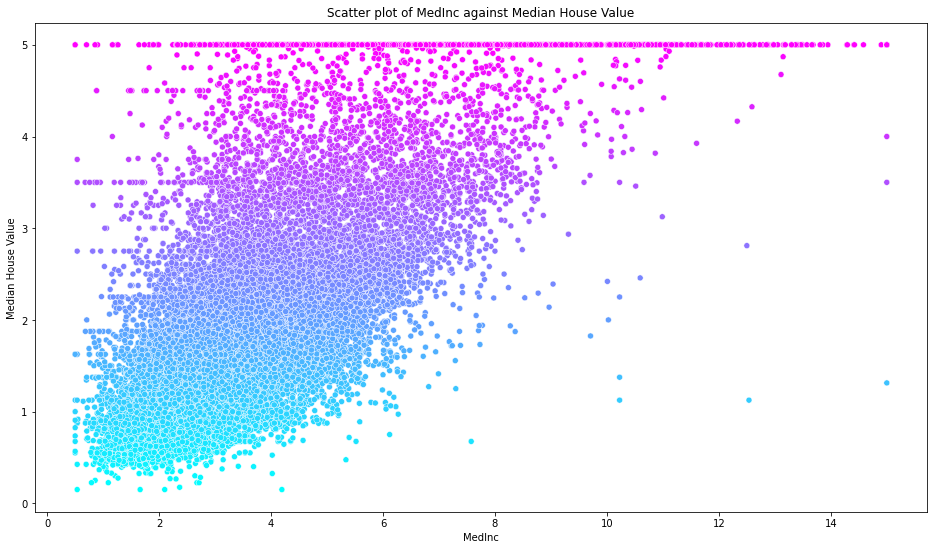

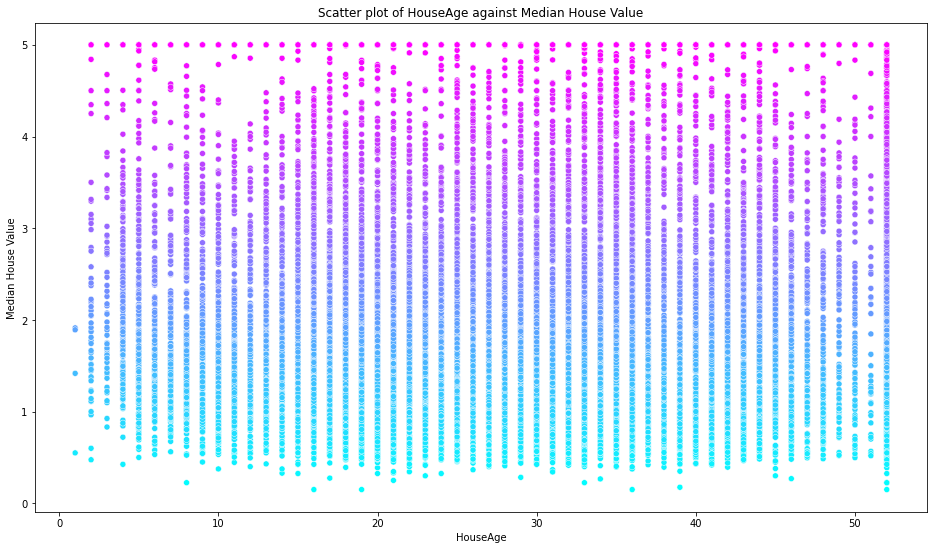

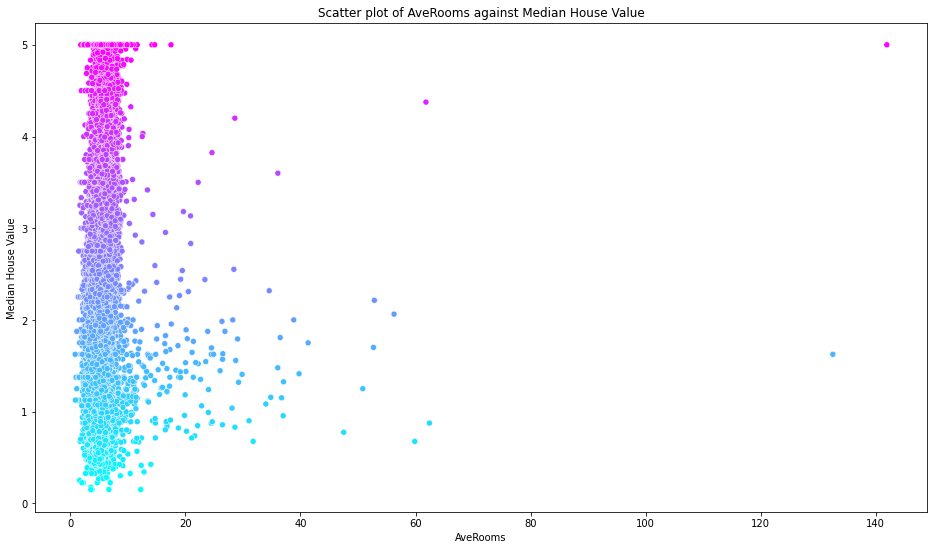

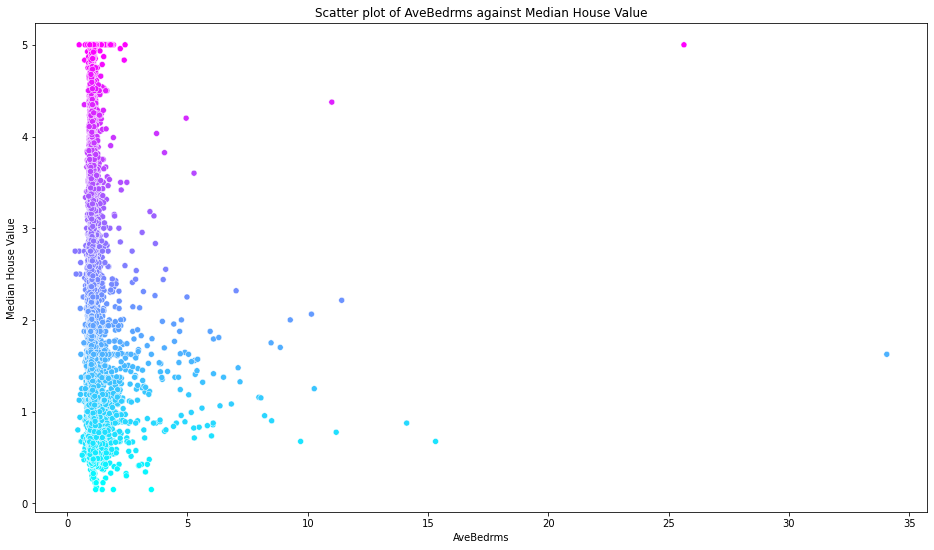

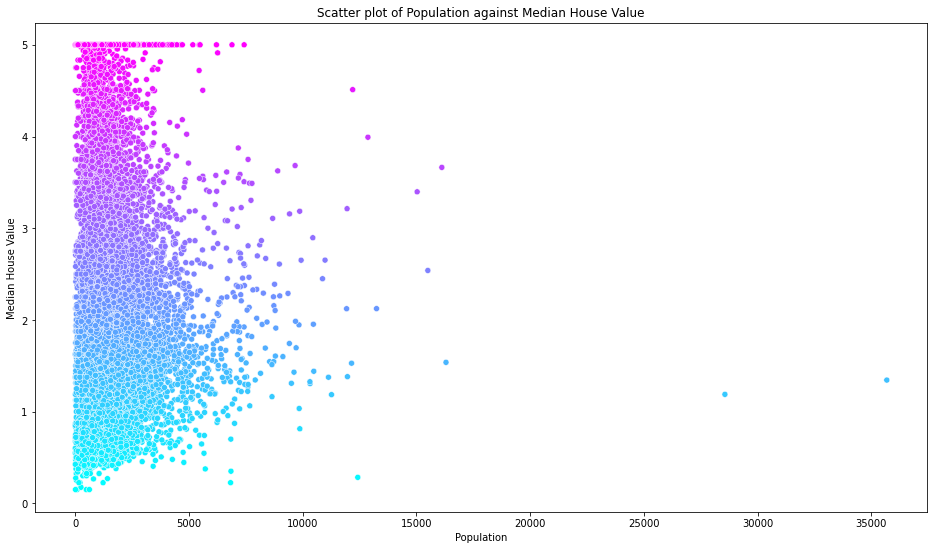

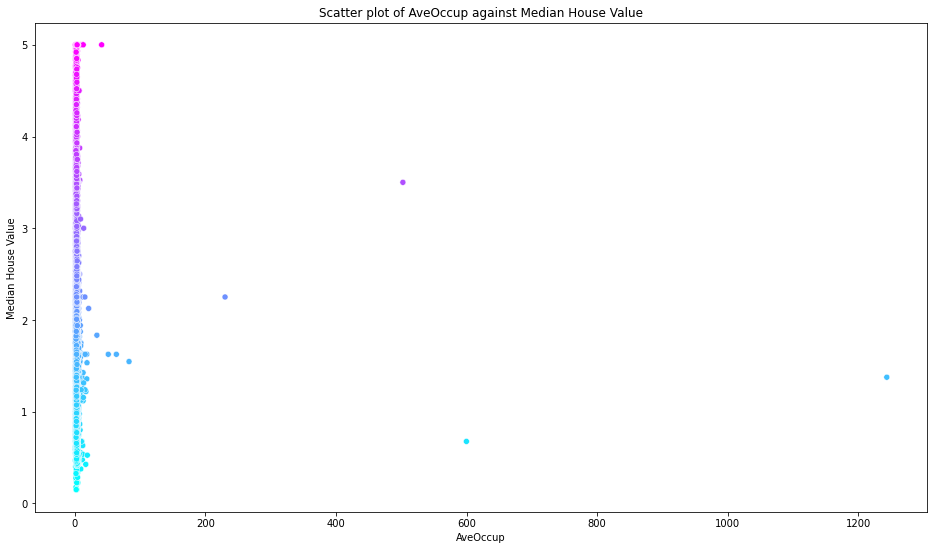

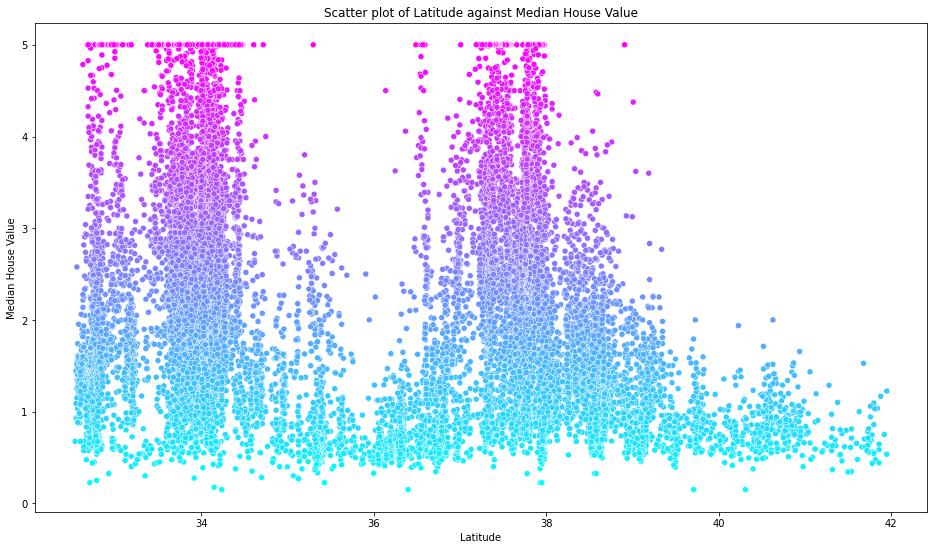

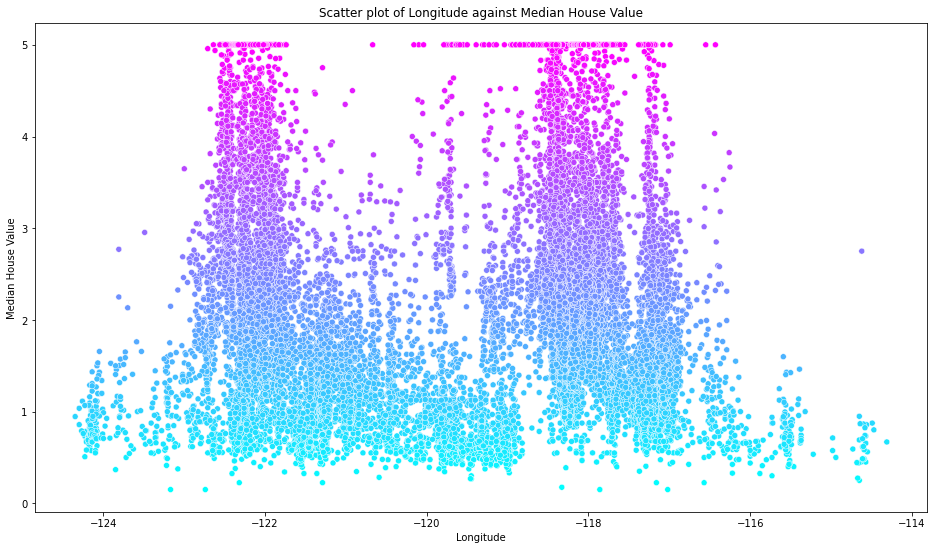

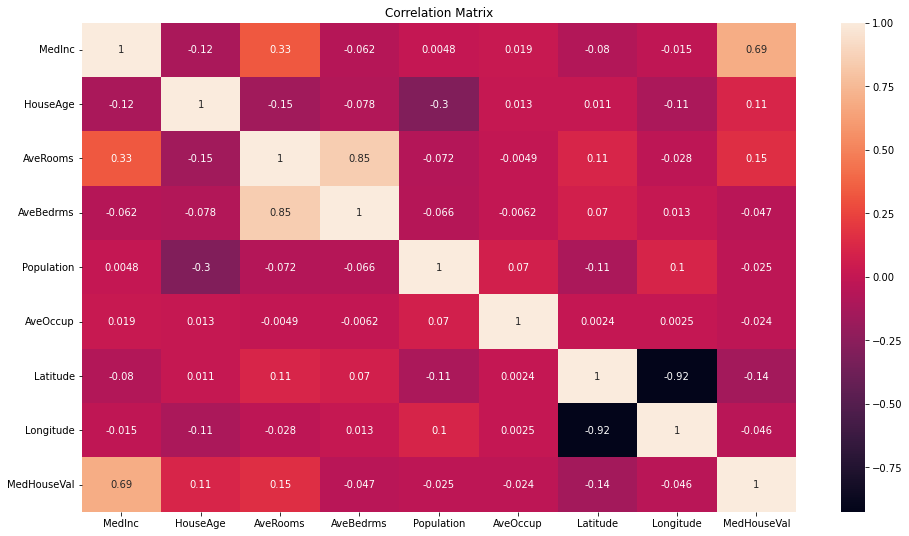

<Figure size 432x288 with 0 Axes>

In [4]:
lr.plot_features()

In [5]:
lr.split()

Train data size is: (20000, 8)
Train target size is: (20000, 1)
Test data size is: (640, 8)
Test target size is: (640, 1)


In [6]:
lr.fit_predict_linear(ols=True)


 Linear Regression Summary: 
                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.892     
Dependent Variable:     MedHouseVal      AIC:                         46728.9612
Date:                   2024-02-07 14:43 BIC:                         46792.1891
No. Observations:       20000            Log-Likelihood:              -23356.   
Df Model:               8                F-statistic:                 2.066e+04 
Df Residuals:           19992            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.892            Scale:                       0.60542   
------------------------------------------------------------------------------------
                 Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
MedInc           0.5106       0.0043     118.2240     0.0000      0.5021      0.5191
HouseA


 R^2: 0.636


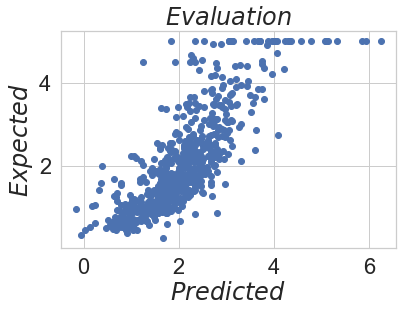

In [7]:
lr.err_plot()

In [8]:
lr.fit_predict_linear(ols=False)

/var/folders/sb/h0gbv1954jlc4qkp7wnc580h0000gn/T/ipykernel_1381/2639337230.py:123: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.rf_reg = self.linreg_rf.fit(self.X_train, self.y_train)



 R^2: 0.838


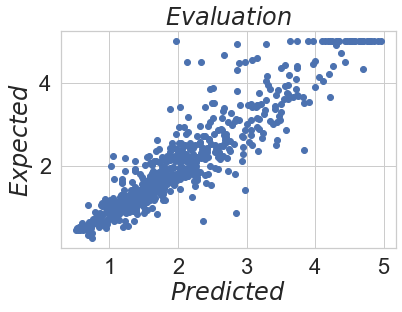

In [9]:
lr.err_plot()

In [10]:
dir(lr)

['X_test',
 'X_train',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 'california',
 'col_name',
 'data',
 'err_plot',
 'fit_predict_linear',
 'linreg',
 'linreg_ols',
 'linreg_rf',
 'linreg_summary',
 'plot_features',
 'plots',
 'rf_reg',
 'rsq',
 'split',
 'target',
 'y_predict',
 'y_test',
 'y_train']